# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


## 1. READING DATA

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*100)
print("The features of  data :", project_data.columns.values)
print('-'*100)
project_data.head(2)

Number of data points in train data (109248, 17)
----------------------------------------------------------------------------------------------------
The features of  data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
----------------------------------------------------------------------------------------------------


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [4]:
print("Number of data points in resource data", resource_data.shape)
print('-'*100)
print("The features of resource data :", resource_data.columns.values)
print('-'*100)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
----------------------------------------------------------------------------------------------------
The features of resource data : ['id' 'description' 'quantity' 'price']
----------------------------------------------------------------------------------------------------


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
y_value_counts = project_data['project_is_approved'].value_counts()
print(y_value_counts)

1    92706
0    16542
Name: project_is_approved, dtype: int64


### 1.1 Check for nan values if any

In [7]:
project_data.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
Date                                                 0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

#### teacher_prefix has nan values.. We will replace it with most freuent value Mrs.

In [8]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('Mrs.')

## 2. Pre-processing DATA

## 2.1 Text processing: project_essay

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [12]:
# Combining all the above stundents 
def Text_cleaner(data):
    from tqdm import tqdm
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('nan',' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

In [13]:
# after preprocesing
preprocessed_essays=Text_cleaner(project_data['essay'])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [01:19<00:00, 1372.41it/s]


In [14]:
project_data['essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

## 2.2 Text Preprocessing: `project_title`

In [15]:
# after preprocesing
preprocessed_title=Text_cleaner(project_data['project_title'])
project_data['cleaned_title']=preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 34529.72it/s]


## 2.3 Text Preprocessing: `project_resource_summary`

In [16]:
# similarly you can preprocess the summary also
preprocessed_project_summary=Text_cleaner(project_data['project_resource_summary'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 14684.90it/s]


In [17]:
project_data['cleaned_summary']=preprocessed_project_summary
project_data.drop(['project_resource_summary'], axis=1, inplace=True)

## 2.4 Preprocessing: `project_subject_categories`

In [18]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 2.5 Preprocessing: `project_subject_subcategories`

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 2.6 Preprocessing: `project_grade_category`

In [20]:
## we need to remove the spaces, replace the '-' with '_' and convert all the letters to small
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()

## 3. Creating New Features

1. Sentiment scores of each of the Essay : Numerical data
2. Number of words in the Title : Numerical data
3. Price : Numerical data
4. Quantity : Numerical data

### 3.1 Calculate Sentiment Scores for the essay feature

In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sonaw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
## https://www.nltk.org/howto/sentiment.html
## It returns 4 scores as follows --> neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93 and will add these 4 features
sid = SentimentIntensityAnalyzer()
negative = []
positive = []
neutral = []
compound = []
for sent in tqdm(project_data['essay']):
    neg = sid.polarity_scores(sent)['neg']
    neu = sid.polarity_scores(sent)['neu']
    pos = sid.polarity_scores(sent)['pos']
    comp = sid.polarity_scores(sent)['compound']
    negative.append(neg)
    positive.append(pos)
    neutral.append(neu)
    compound.append(comp)
    
project_data['essay_sentiment_negative'] = negative
project_data['essay_sentiment_positive'] = positive
project_data['essay_sentiment_neutral'] = neutral
project_data['essay_sentiment_compound'] = compound

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [14:33<00:00, 125.07it/s]


### 3.2 Calculate Number of words in Title

In [23]:
## Creating new feature: title_word_count
title_word_count = []
for i in tqdm(project_data['cleaned_title']):
    title_word_count.append(len(i.split()))
project_data['title_word_count'] = title_word_count
project_data.head(2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 786567.00it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          grades_prek_2   
76127           UT 2016-04-27 00:31:25             grades_3_5   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

                                                   essay  \
55660  fortunate enough use fairy tale stem kits clas...   
76127  imagine 8 9 years old third grade classroom se...   

                             cleaned_title  \
55660  engineering steam primary classroom   
76127                  sensory tools focus   

                                         cleaned_summary clean_categories  \
55660  students need stem kits learn critical science...     Math_Science   
76127  students need boogie boards quiet sensory brea...     SpecialNeeds   

                      clean_subcategories  essay_sentiment_negative  \
55660  AppliedSciences Health_LifeScience                     0.013   
76127                        SpecialNeeds                     0.078   

       essay_sentiment_positive  essay_sentiment_neutral  \
55660                     0.214                    0.773   
76127                     0.272                    0.650   

       essay_sentiment_compound  title_word_count  
55660                    0.9867                 4  
76127                    0.9899                 3

### 3.3 Calculate Price and Quantity using resources data

In [24]:
price_data = resource_data.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on = 'id',how = 'left')
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   
1           UT 2016-04-27 00:31:25             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

                                               essay  ...  \
0  fortunate enough use fairy tale stem kits clas...  ...   
1  imagine 8 9 years old third grade classroom se...  ...   

                                     cleaned_summary clean_categories  \
0  students need stem kits learn critical science...     Math_Science   
1  students need boogie boards quiet sensory brea...     SpecialNeeds   

                  clean_subcategories essay_sentiment_negative  \
0  AppliedSciences Health_LifeScience                    0.013   
1                        SpecialNeeds                    0.078   

   essay_sentiment_positive  essay_sentiment_neutral  \
0                     0.214                    0.773   
1                     0.272                    0.650   

   essay_sentiment_compound  title_word_count   price  quantity  
0                    0.9867                 4  725.05         4  
1                    0.9899                 3  213.03         8  

[2 rows x 21 columns]

## 4. Train-Test Split using Stratified Sampling

### Splitting features and class label

In [25]:
y = project_data['project_is_approved']
x = project_data.drop(['project_is_approved'],axis=1)
x.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   

   teacher_number_of_previously_posted_projects  \
0                                            53   

                                               essay  \
0  fortunate enough use fairy tale stem kits clas...   

                         cleaned_title  \
0  engineering steam primary classroom   

                                     cleaned_summary clean_categories  \
0  students need stem kits learn critical science...     Math_Science   

                  clean_subcategories  essay_sentiment_negative  \
0  AppliedSciences Health_LifeScience                     0.013   

   essay_sentiment_positive  essay_sentiment_neutral  \
0                     0.214                    0.773   

   essay_sentiment_compound  title_word_count   price  quantity  
0                    0.9867                 4  725.05         4

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(76473, 20) (76473,)
(32775, 20) (32775,)


## 5.1 Make Data Model Ready: Encoding Essay,project_title

### 5.1.1 Vectorization using BOW

#### 5.1.1.1 Essay : BOW

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer.fit(x_train['essay'])
# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_bow = vectorizer.transform(x_train['essay'].values)
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)
#print(x_train_essay_bow)
print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
feature_names_bow = []
#print(vectorizer.get_feature_names())
feature_names_bow.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 5000) (76473,)
(32775, 5000) (32775,)


#### 5.1.1.2 project_title : BOW

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,max_features=500)
vectorizer.fit(x_train['cleaned_title'])
# we use the fitted CountVectorizer to convert the text to vector
x_train_title_bow = vectorizer.transform(x_train['cleaned_title'].values)
x_test_title_bow = vectorizer.transform(x_test['cleaned_title'].values)
#print(x_train_essay_bow)
print("After vectorizations")
print(x_train_title_bow.shape, y_train.shape)
print(x_test_title_bow.shape, y_test.shape)
#print(vectorizer.get_feature_names())
feature_names_bow.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 500) (76473,)
(32775, 500) (32775,)


### 5.1.2 Vectorization using TFIDF

#### 5.1.2.1 Essay : TFIDF

In [29]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer.fit(x_train['essay'])
# we use the fitted TfidfVectorizer to convert the text to vector
x_train_essay_tfidf = vectorizer.transform(x_train['essay'].values)
x_test_essay_tfidf = vectorizer.transform(x_test['essay'].values)
#print(x_train_essay_tfidf)
print("After vectorizations")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_test_essay_tfidf.shape, y_test.shape)
feature_names_tfidf = []
#print(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 5000) (76473,)
(32775, 5000) (32775,)


#### 5.1.2.2 project_title : TFIDF

In [30]:
vectorizer = TfidfVectorizer(min_df=10,max_features=500)
vectorizer.fit(x_train['cleaned_title'])
# we use the fitted TfidfVectorizer to convert the text to vector
x_train_title_tfidf = vectorizer.transform(x_train['cleaned_title'].values)
x_test_title_tfidf = vectorizer.transform(x_test['cleaned_title'].values)
#print(x_train_essay_bow)
print("After vectorizations")
print(x_train_title_tfidf.shape, y_train.shape)
print(x_test_title_tfidf.shape, y_test.shape)
#print(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 500) (76473,)
(32775, 500) (32775,)


### 5.1.3 Vectorization using Avg W2V

#### Using Pre-trained glove vector

In [31]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors','rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [32]:
## computing avg-w2v using pre-trained glove vecotr model

def compute_avg_w2v(data):
    avg_w2v_vectors = [] # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data):
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words = 0 # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words+=1
        if cnt_words!=0:
            vector/=cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

#### 5.1.3.1 Essay : Avg. W2V

In [33]:
x_train_essay_avg_w2v = compute_avg_w2v(x_train['essay'].values)
x_test_essay_avg_w2v = compute_avg_w2v(x_test['essay'].values)
print("After vectorizations")
print(len(x_train_essay_avg_w2v), len(x_train_essay_avg_w2v[0]))
print(len(x_test_essay_avg_w2v), len(x_test_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [00:09<00:00, 3484.26it/s]

After vectorizations
76473 300
32775 300


#### 5.1.3.2 project_title : Avg. W2V

In [34]:
x_train_title_avg_w2v = compute_avg_w2v(x_train['cleaned_title'].values)
x_test_title_avg_w2v = compute_avg_w2v(x_test['cleaned_title'].values)
print("After vectorizations")
print(len(x_train_title_avg_w2v), len(x_train_title_avg_w2v[0]))
print(len(x_test_title_avg_w2v), len(x_test_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 67330.88it/s]

After vectorizations
76473 300
32775 300


### 5.1.4 Vectorization using TFIDF W2V

#### 5.1.4.1 Essay : Tfidf weighted Avg. W2V

In [35]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [36]:
# compute tfidf-avg Word2Vec for each review.
def calculate_tfidf_w2v(data):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

In [37]:
x_train_essay_tfidf_w2v = calculate_tfidf_w2v(x_train['essay'])
x_test_essay_tfidf_w2v = calculate_tfidf_w2v(x_test['essay'])
print("After vectorizations")
print(len(x_train_essay_tfidf_w2v), len(x_train_essay_tfidf_w2v[0]))
print(len(x_test_essay_tfidf_w2v), len(x_test_essay_tfidf_w2v[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [01:07<00:00, 487.65it/s]

After vectorizations
76473 300
32775 300


#### 5.1.4.2 project_title : Tfidf weighted Avg. W2V

In [38]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['cleaned_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [39]:
x_train_title_tfidf_w2v = calculate_tfidf_w2v(x_train['cleaned_title'])
x_test_title_tfidf_w2v = calculate_tfidf_w2v(x_test['cleaned_title'])
print("After vectorizations")
print(len(x_train_title_tfidf_w2v), len(x_train_title_tfidf_w2v[0]))
print(len(x_test_title_tfidf_w2v), len(x_test_title_tfidf_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 34110.93it/s]

After vectorizations
76473 300
32775 300


## 5.2 Make Data Model Ready: Encoding Numerical and Categorical features

### 5.2.1 Encoding categorical feature: clean_categories

In [40]:
## https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(binary=True) ## One hot encoding
vectorizer.fit(x_train['clean_categories'])
x_train_categories = vectorizer.transform(x_train['clean_categories'])
x_test_categories = vectorizer.transform(x_test['clean_categories'])
print("After vectorizations")
print(x_train_categories.shape, y_train.shape)
print(x_test_categories.shape, y_test.shape)
print(vectorizer.get_feature_names())
feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 9) (76473,)
(32775, 9) (32775,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### 5.2.2 Encoding categorical feature: clean_subcategories

In [41]:
## https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer.fit(x_train['clean_subcategories'])
x_train_subcategories = vectorizer.transform(x_train['clean_subcategories'])
x_test_subcategories = vectorizer.transform(x_test['clean_subcategories'])
print("After vectorizations")
print(x_train_subcategories.shape, y_train.shape)
print(x_test_subcategories.shape, y_test.shape)
print(vectorizer.get_feature_names())
feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 30) (76473,)
(32775, 30) (32775,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### 5.2.3 Encoding categorical feature: school_state

In [42]:
## https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer.fit(x_train['school_state'])
x_train_school_state = vectorizer.transform(x_train['school_state'].values)
x_test_school_state = vectorizer.transform(x_test['school_state'].values)
print("After vectorizations")
print(x_train_school_state.shape, y_train.shape)
print(x_test_school_state.shape, y_test.shape)
print(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())
feature_names_bow.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 51) (76473,)
(32775, 51) (32775,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 5.2.4 Encoding categorical feature: teacher_prefix

In [43]:
## https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer.fit(x_train['teacher_prefix'])
x_train_teacher_prefix = vectorizer.transform(x_train['teacher_prefix'].values)
x_test_teacher_prefix = vectorizer.transform(x_test['teacher_prefix'].values)
print("After vectorizations")
print(x_train_teacher_prefix.shape, y_train.shape)
print(x_test_teacher_prefix.shape, y_test.shape)
print(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())
feature_names_bow.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 5) (76473,)
(32775, 5) (32775,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### 5.2.5 Encoding categorical feature: project_grade_category

In [44]:
## https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer.fit(x_train['project_grade_category'])
x_train_project_grade_category = vectorizer.transform(x_train['project_grade_category'])
x_test_project_grade_category = vectorizer.transform(x_test['project_grade_category'])
print("After vectorizations")
print(x_train_project_grade_category.shape, y_train.shape)
print(x_test_project_grade_category.shape, y_test.shape)
print(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())
feature_names_bow.extend(vectorizer.get_feature_names())

After vectorizations
(76473, 4) (76473,)
(32775, 4) (32775,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 5.2.6 Encoding Numerical feature: Price

In [45]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer.fit(x_train['price'].values.reshape(-1,1))
x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))
print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


### 5.2.7 Encoding Numerical feature: teacher_number_of_previously_posted_projects

In [46]:
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_train_no_of_projects_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_no_of_projects_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_no_of_projects_norm.shape, y_train.shape)
print(x_test_no_of_projects_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


### 5.2.8 Encoding Numerical feature: 'essay_sentiment_positive'

In [47]:
normalizer.fit(x_train['essay_sentiment_positive'].values.reshape(-1,1))
x_train_essay_sentiment_positive_norm = normalizer.transform(x_train['essay_sentiment_positive'].values.reshape(-1,1))
x_test_essay_sentiment_positive_norm = normalizer.transform(x_test['essay_sentiment_positive'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_sentiment_positive_norm.shape, y_train.shape)
print(x_test_essay_sentiment_positive_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


### 5.2.9 Encoding Numerical feature: 'essay_sentiment_neutral'

In [48]:
normalizer.fit(x_train['essay_sentiment_neutral'].values.reshape(-1,1))
x_train_essay_sentiment_neutral_norm = normalizer.transform(x_train['essay_sentiment_neutral'].values.reshape(-1,1))
x_test_essay_sentiment_neutral_norm = normalizer.transform(x_test['essay_sentiment_neutral'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_sentiment_neutral_norm.shape, y_train.shape)
print(x_test_essay_sentiment_neutral_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


### 5.2.10 Encoding Numerical feature: 'essay_sentiment_compound'

In [49]:
normalizer.fit(x_train['essay_sentiment_compound'].values.reshape(-1,1))
x_train_essay_sentiment_compound_norm = normalizer.transform(x_train['essay_sentiment_compound'].values.reshape(-1,1))
x_test_essay_sentiment_compound_norm = normalizer.transform(x_test['essay_sentiment_compound'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_sentiment_compound_norm.shape, y_train.shape)
print(x_test_essay_sentiment_compound_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


### 5.2.11 Encoding Numerical feature: 'essay_sentiment_negative'

In [50]:
normalizer.fit(x_train['essay_sentiment_negative'].values.reshape(-1,1))
x_train_essay_sentiment_negative_norm = normalizer.transform(x_train['essay_sentiment_negative'].values.reshape(-1,1))
x_test_essay_sentiment_negative_norm = normalizer.transform(x_test['essay_sentiment_negative'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_sentiment_negative_norm.shape, y_train.shape)
print(x_test_essay_sentiment_negative_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


## 6. Concatenating all the features

In [51]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
## BOW related feature along with other categorical and numerical features
X_tr_bow = hstack((x_train_title_bow, x_train_essay_bow, x_train_categories, x_train_subcategories, x_train_school_state, 
                     x_train_teacher_prefix,x_train_project_grade_category,x_train_price_norm,x_train_no_of_projects_norm,
                     x_train_essay_sentiment_positive_norm,x_train_essay_sentiment_neutral_norm,x_train_essay_sentiment_compound_norm,
                     x_train_essay_sentiment_negative_norm)).tocsr()
X_te_bow = hstack((x_test_title_bow, x_test_essay_bow, x_test_categories, x_test_subcategories, x_test_school_state, x_test_teacher_prefix,
                     x_test_project_grade_category,x_test_price_norm,x_test_no_of_projects_norm,
                     x_test_essay_sentiment_positive_norm,x_test_essay_sentiment_neutral_norm,x_test_essay_sentiment_compound_norm,
                     x_test_essay_sentiment_negative_norm)).tocsr()

## Avg W2v related feature along with other categorical and numerical features
X_tr_avg_w2v = hstack((x_train_title_avg_w2v, x_train_essay_avg_w2v, x_train_categories, x_train_subcategories, x_train_school_state, 
                     x_train_teacher_prefix,x_train_project_grade_category,x_train_price_norm,x_train_no_of_projects_norm,
                     x_train_essay_sentiment_positive_norm,x_train_essay_sentiment_neutral_norm,x_train_essay_sentiment_compound_norm,
                     x_train_essay_sentiment_negative_norm)).tocsr()
X_te_avg_w2v = hstack((x_test_title_avg_w2v, x_test_essay_avg_w2v, x_test_categories, x_test_subcategories, x_test_school_state, x_test_teacher_prefix,
                     x_test_project_grade_category,x_test_price_norm,x_test_no_of_projects_norm,
                     x_test_essay_sentiment_positive_norm,x_test_essay_sentiment_neutral_norm,x_test_essay_sentiment_compound_norm,
                     x_test_essay_sentiment_negative_norm)).tocsr()

## Tfidf related feature along with other categorical and numerical features
X_tr_tfidf = hstack((x_train_title_tfidf, x_train_essay_tfidf, x_train_categories, x_train_subcategories, x_train_school_state, 
                     x_train_teacher_prefix,x_train_project_grade_category,x_train_price_norm,x_train_no_of_projects_norm,
                     x_train_essay_sentiment_positive_norm,x_train_essay_sentiment_neutral_norm,x_train_essay_sentiment_compound_norm,
                     x_train_essay_sentiment_negative_norm)).tocsr()
X_te_tfidf = hstack((x_test_title_bow, x_test_essay_tfidf, x_test_categories, x_test_subcategories, x_test_school_state, x_test_teacher_prefix,
                     x_test_project_grade_category,x_test_price_norm,x_test_no_of_projects_norm,
                     x_test_essay_sentiment_positive_norm,x_test_essay_sentiment_neutral_norm,x_test_essay_sentiment_compound_norm,
                     x_test_essay_sentiment_negative_norm)).tocsr()

## Tfidf-W2V related feature along with other categorical and numerical features
X_tr_tfidf_w2v = hstack((x_train_title_tfidf_w2v, x_train_essay_tfidf_w2v, x_train_categories, x_train_subcategories, x_train_school_state, 
                     x_train_teacher_prefix,x_train_project_grade_category,x_train_price_norm,x_train_no_of_projects_norm,
                     x_train_essay_sentiment_positive_norm,x_train_essay_sentiment_neutral_norm,x_train_essay_sentiment_compound_norm,
                     x_train_essay_sentiment_negative_norm)).tocsr()
X_te_tfidf_w2v = hstack((x_test_title_tfidf_w2v, x_test_essay_tfidf_w2v, x_test_categories, x_test_subcategories, x_test_school_state, x_test_teacher_prefix,
                     x_test_project_grade_category,x_test_price_norm,x_test_no_of_projects_norm,
                     x_test_essay_sentiment_positive_norm,x_test_essay_sentiment_neutral_norm,x_test_essay_sentiment_compound_norm,
                     x_test_essay_sentiment_negative_norm)).tocsr()

In [52]:
print("Final Data matrix Using BOW")
print(X_tr_bow.shape, y_train.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)
print("Final Data matrix Using TFIDF")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)
print("Final Data matrix Using Avg. W2V")
print(X_tr_avg_w2v.shape, y_train.shape)
print(X_te_avg_w2v.shape, y_test.shape)
print("="*100)
print("Final Data matrix Using TFIDF W2V")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix Using BOW
(76473, 5605) (76473,)
(32775, 5605) (32775,)
Final Data matrix Using TFIDF
(76473, 5605) (76473,)
(32775, 5605) (32775,)
Final Data matrix Using Avg. W2V
(76473, 705) (76473,)
(32775, 705) (32775,)
Final Data matrix Using TFIDF W2V
(76473, 705) (76473,)
(32775, 705) (32775,)


# 7.Applying Decision Tree on different kind of featurization

## 7.1 Applying Decision Tree on BOW related features

In [53]:
## HyperParameter tuning using GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
params = {'max_depth':[1,3,5,10,20,30],
          'min_samples_split':[5,10,50,100,200,300,500]
         }
clf = GridSearchCV(dt,params,scoring='roc_auc',return_train_score=True,cv=3,n_jobs=-1)
clf.fit(X_tr_bow,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 50, 100, 200, 300, 500]},
             return_train_score=True, scoring='roc_auc')

Text(0.5, 1.0, 'CV Set')

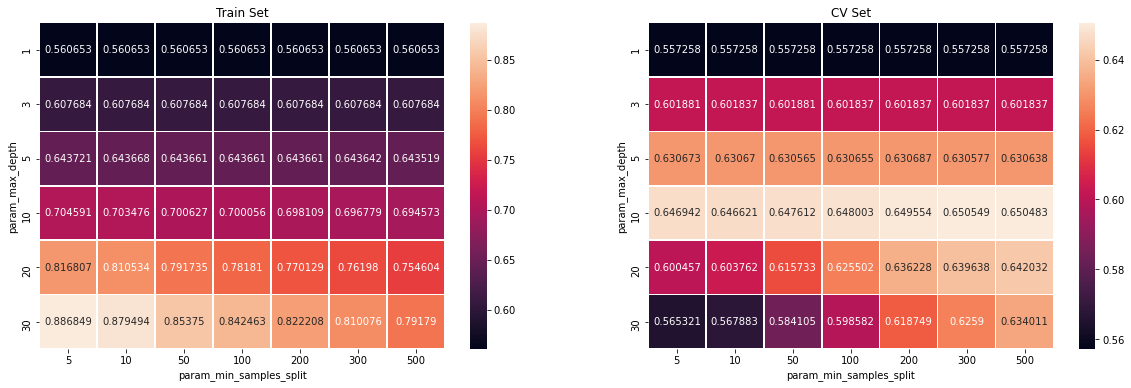

In [54]:
## https://stackoverflow.com/questions/24640399/how-to-unstack-or-pivot-in-pandas
best_scores_bow = pd.DataFrame(clf.cv_results_).groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_train_score','mean_test_score']]

import seaborn as sns

## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig,ax = plt.subplots(1,2, figsize = (20,6))

## https://seaborn.pydata.org/generated/seaborn.heatmap.html
## https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
sns.heatmap(best_scores_bow.mean_train_score, annot = True, fmt = 'g', ax = ax[0], linewidths=.5)
sns.heatmap(best_scores_bow.mean_test_score, annot = True, fmt = 'g', ax = ax[1], linewidths=.5)
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

In [55]:
print('Best hyper parameter:', clf.best_params_)
print('Best score:',clf.best_score_)

Best hyper parameter: {'max_depth': 10, 'min_samples_split': 300}
Best score: 0.6505490781179196


### 7.1.1 Training Model Using Best HyperParameter and Plotting ROC Curve

In [56]:
#Defining a function to predict the prob. values for given data
def pred_proba(clf,data):
    return clf.predict_proba(data)[:,1]

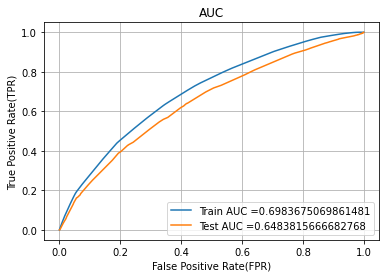

In [57]:
dt = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], 
                                   min_samples_split=clf.best_params_['min_samples_split'])
dt.fit(X_tr_bow,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# predicting train,test proba. scores
y_train_pred = pred_proba(dt,X_tr_bow)
y_test_pred = pred_proba(dt,X_te_bow)

#print(y_test_pred)

# fetching fpr,tpr,threshold values for train,test data
train_fpr, train_tpr, tr_threshold = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test,y_test_pred)

# plotting the ROC curve on both train and test.
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### 7.1.2 Visualizing Confusion Matrix on Train and Test Data

In [58]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print("="*100)
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [59]:
from sklearn.metrics import confusion_matrix
import numpy as np
print("="*100)
best_t_bow = find_best_threshold(tr_threshold,train_tpr,train_tpr)
print("Train confusion matrix")
train_confusion_matrix_bow = confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t_bow))
print(train_confusion_matrix_bow)
print("="*100)
print("Test confusion matrix")
test_confusion_matrix_bow = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t_bow))
print(test_confusion_matrix_bow)

The maximum value of tpr*(1-fpr) 0.24978928632737754 for threshold 0.879
Train confusion matrix
[[ 8727  2852]
 [31505 33389]]
Test confusion matrix
[[ 3497  1466]
 [13680 14132]]


In [60]:
## https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
## https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/

def plot_confusion_matrix(train_confusion_matrix,test_confusion_matrix):
    key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    
    labels_train = (np.asarray(["{0} = {1}" .format(key, value) for key, value in zip(key.flatten(), train_confusion_matrix.flatten())])).reshape(2,2)
    labels_test = (np.asarray(["{0} = {1}" .format(key, value) for key, value in zip(key.flatten(), test_confusion_matrix.flatten())])).reshape(2,2)

    sns.heatmap(train_confusion_matrix, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
    sns.heatmap(test_confusion_matrix, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

    ax[0].set_title('Train Set')
    ax[1].set_title('Test Set')

    plt.show()

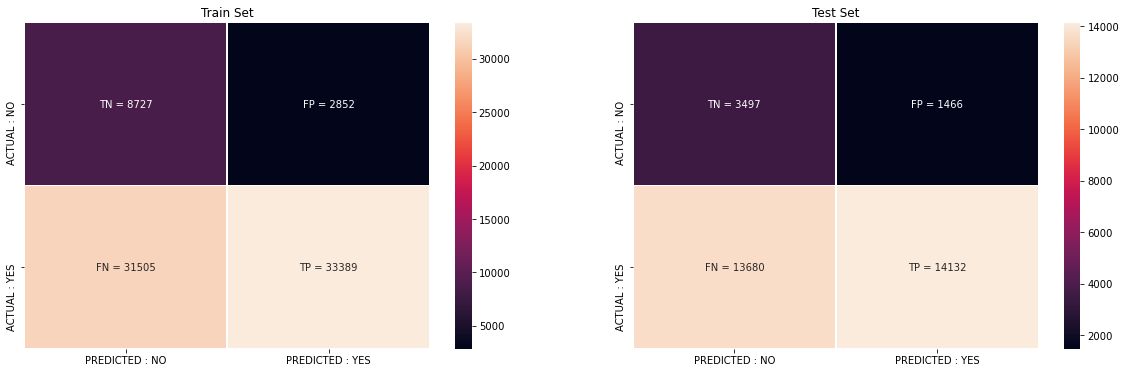

In [61]:
plot_confusion_matrix(train_confusion_matrix_bow,test_confusion_matrix_bow)

### 7.1.3 False Positive Essay Word Cloud

In [62]:
y_test_pred_score = predict_with_best_t(y_test_pred,best_t_bow)

In [63]:
y_test_pred_score[1:10]

[0, 1, 1, 1, 1, 0, 1, 1, 0]

In [64]:
fpi = []
for i in range(len(y_test_pred_score)):
    if((y_test.values[i] == 0) & (y_test_pred_score[i] == 1)):
        fpi.append(i)

In [65]:
fp_essay = []
essay = x_test['essay'].values
for i in fpi:
    fp_essay.append(essay[i])

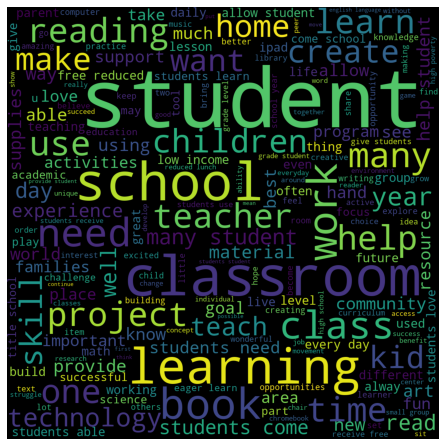

In [66]:
## https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200, stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### 7.1.4 Box Plot of 'Price' of False Positives

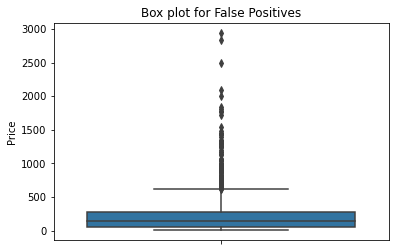

In [67]:
df = pd.DataFrame(x_test)
df_fp = df.iloc[fpi,:]
sns.boxplot(y = df_fp['price'].values)
plt.title("Box plot for False Positives")
plt.ylabel("Price")
plt.show()

### 7.1.5 PDF of 'teacher_number_of_previously_posted_projects' of these False positive data points

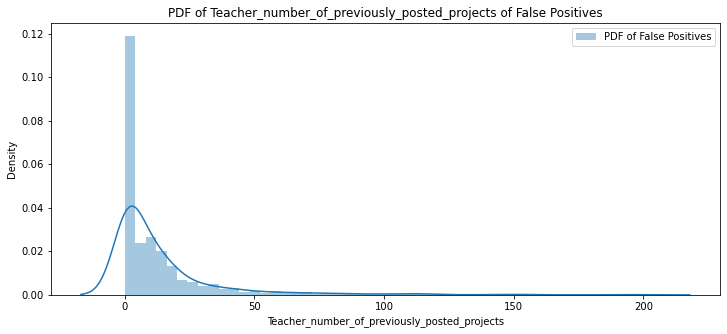

In [68]:
plt.figure(figsize=(12,5))
sns.distplot(df_fp['teacher_number_of_previously_posted_projects'].values, label="PDF of False Positives")
plt.title('PDF of Teacher_number_of_previously_posted_projects of False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

## 7.2 Applying Decision Tree on TFIDF related features

In [69]:
## HyperParameter tuning using GridSearchCV

dt = DecisionTreeClassifier()
params = {'max_depth':[1,3,5,10,20,30],
          'min_samples_split':[5,10,50,100,200,300,500]
         }
clf = GridSearchCV(dt,params,scoring='roc_auc',return_train_score=True,cv=3,n_jobs=-1)
clf.fit(X_tr_tfidf,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 50, 100, 200, 300, 500]},
             return_train_score=True, scoring='roc_auc')

Text(0.5, 1.0, 'CV Set')

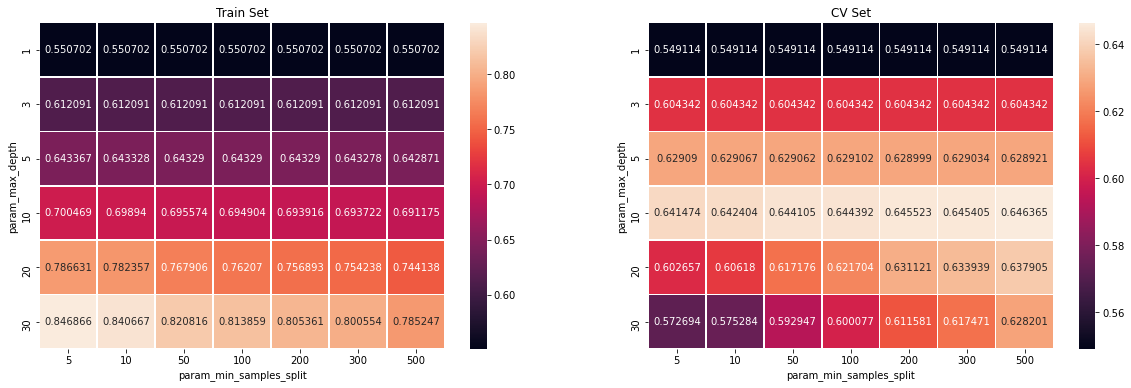

In [70]:
## https://stackoverflow.com/questions/24640399/how-to-unstack-or-pivot-in-pandas
best_scores_tfidf = pd.DataFrame(clf.cv_results_).groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_train_score','mean_test_score']]

import seaborn as sns

## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig,ax = plt.subplots(1,2, figsize = (20,6))

## https://seaborn.pydata.org/generated/seaborn.heatmap.html
## https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
sns.heatmap(best_scores_tfidf.mean_train_score, annot = True, fmt = 'g', ax = ax[0], linewidths=.5)
sns.heatmap(best_scores_tfidf.mean_test_score, annot = True, fmt = 'g', ax = ax[1], linewidths=.5)
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

In [71]:
print('Best hyper parameter:', clf.best_params_)
print('Best score:',clf.best_score_)

Best hyper parameter: {'max_depth': 10, 'min_samples_split': 500}
Best score: 0.6463654885631308


### 7.2.1 Training Model Using Best HyperParameter and Plotting ROC Curve

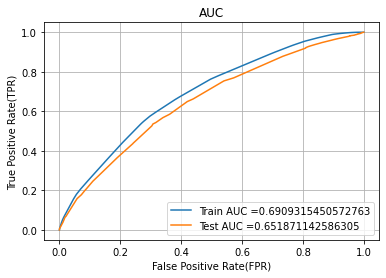

In [72]:
dt = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], 
                                   min_samples_split=clf.best_params_['min_samples_split'])
dt.fit(X_tr_tfidf,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# predicting train,test proba. scores
y_train_pred = pred_proba(dt,X_tr_tfidf)
y_test_pred = pred_proba(dt,X_te_tfidf)

#print(y_test_pred)

# fetching fpr,tpr,threshold values for train,test data
train_fpr, train_tpr, tr_threshold = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test,y_test_pred)

# plotting the ROC curve on both train and test.
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### 7.2.2 Visualizing Confusion Matrix on Train and Test Data

In [73]:
from sklearn.metrics import confusion_matrix
import numpy as np
print("="*100)
best_t_tfidf = find_best_threshold(tr_threshold,train_tpr,train_tpr)
print("Train confusion matrix")
train_confusion_matrix_tfidf = confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t_tfidf))
print(train_confusion_matrix_tfidf)
print("="*100)
print("Test confusion matrix")
test_confusion_matrix_tfidf = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t_tfidf))
print(test_confusion_matrix_tfidf)

The maximum value of tpr*(1-fpr) 0.24878607449614767 for threshold 0.898
Train confusion matrix
[[ 8491  3088]
 [30186 34708]]
Test confusion matrix
[[ 3456  1507]
 [13176 14636]]


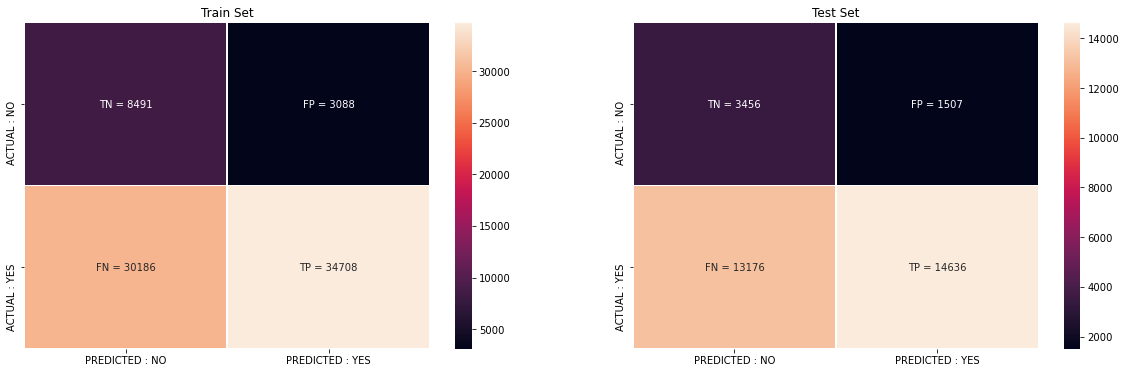

In [74]:
plot_confusion_matrix(train_confusion_matrix_tfidf,test_confusion_matrix_tfidf)

### 7.2.3 False Positive Essay Word Cloud

In [75]:
y_test_pred_score = predict_with_best_t(y_test_pred,best_t_tfidf)

In [76]:
y_test_pred_score[1:10]

[0, 0, 1, 0, 1, 0, 1, 0, 0]

In [77]:
fpi = []
for i in range(len(y_test_pred_score)):
    if((y_test.values[i] == 0) & (y_test_pred_score[i] == 1)):
        fpi.append(i)

In [78]:
fp_essay = []
essay = x_test['essay'].values
for i in fpi:
    fp_essay.append(essay[i])

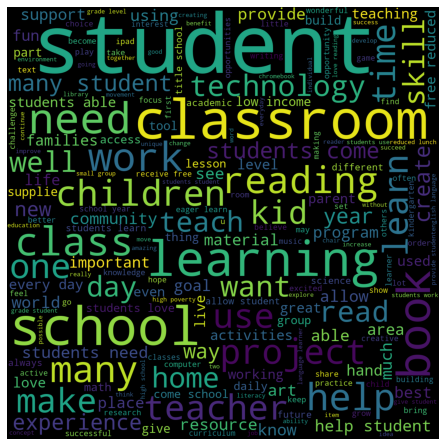

In [79]:
## https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200, stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### 7.2.4 Box Plot of 'Price' of False Positives

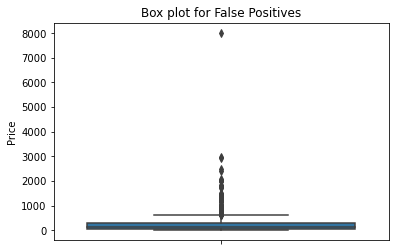

In [80]:
df = pd.DataFrame(x_test)
df_fp = df.iloc[fpi,:]
sns.boxplot(y = df_fp['price'].values)
plt.title("Box plot for False Positives")
plt.ylabel("Price")
plt.show()

### 7.2.5 PDF of 'teacher_number_of_previously_posted_projects' of these False positive data points

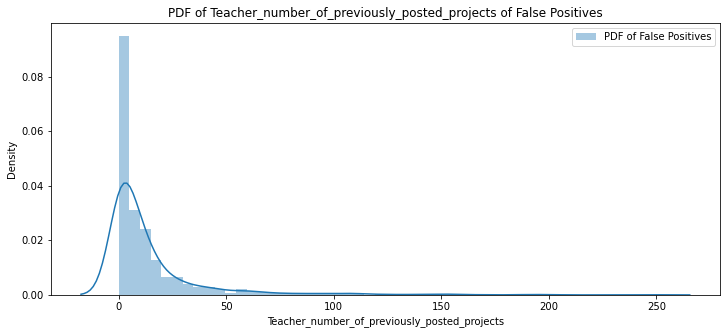

In [81]:
plt.figure(figsize=(12,5))
sns.distplot(df_fp['teacher_number_of_previously_posted_projects'].values, label="PDF of False Positives")
plt.title('PDF of Teacher_number_of_previously_posted_projects of False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

## 7.3 Applying Decision Tree on Avg. W2V related features

In [82]:
## HyperParameter tuning using GridSearchCV

dt = DecisionTreeClassifier()
params = {'max_depth':[1,3,5,10,20,30],
          'min_samples_split':[5,10,50,100,200,300,500]
         }
clf = GridSearchCV(dt,params,scoring='roc_auc',return_train_score=True,cv=3,n_jobs=-1)
clf.fit(X_tr_avg_w2v,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 50, 100, 200, 300, 500]},
             return_train_score=True, scoring='roc_auc')

Text(0.5, 1.0, 'CV Set')

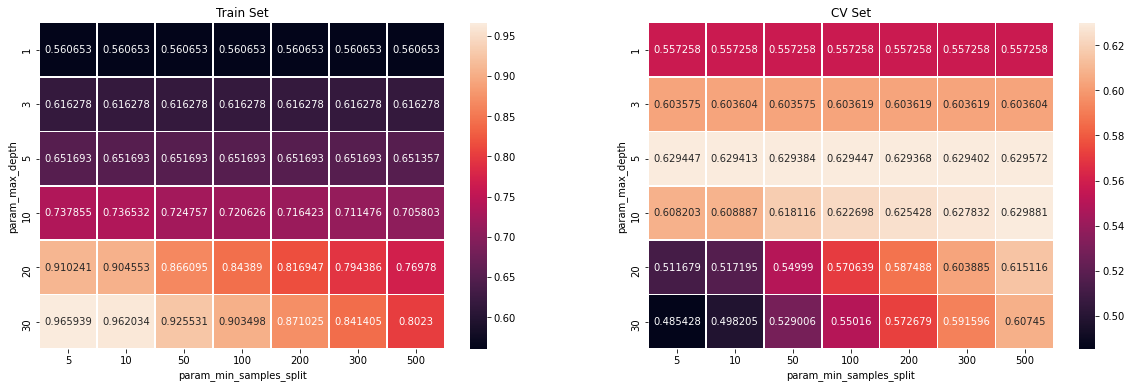

In [83]:
## https://stackoverflow.com/questions/24640399/how-to-unstack-or-pivot-in-pandas
best_scores_avg_w2v = pd.DataFrame(clf.cv_results_).groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_train_score','mean_test_score']]

import seaborn as sns

## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig,ax = plt.subplots(1,2, figsize = (20,6))

## https://seaborn.pydata.org/generated/seaborn.heatmap.html
## https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
sns.heatmap(best_scores_avg_w2v.mean_train_score, annot = True, fmt = 'g', ax = ax[0], linewidths=.5)
sns.heatmap(best_scores_avg_w2v.mean_test_score, annot = True, fmt = 'g', ax = ax[1], linewidths=.5)
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

In [84]:
print('Best hyper parameter:', clf.best_params_)
print('Best score:',clf.best_score_)

Best hyper parameter: {'max_depth': 10, 'min_samples_split': 500}
Best score: 0.6298807151600203


### 7.3.1 Training Model Using Best HyperParameter and Plotting ROC Curve

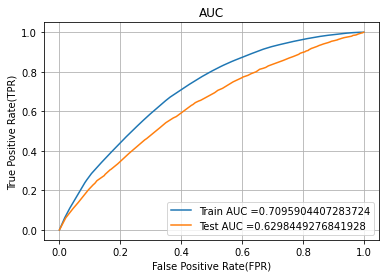

In [85]:
dt = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], 
                                   min_samples_split=clf.best_params_['min_samples_split'])
dt.fit(X_tr_avg_w2v,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# predicting train,test proba. scores
y_train_pred = pred_proba(dt,X_tr_avg_w2v)
y_test_pred = pred_proba(dt,X_te_avg_w2v)

#print(y_test_pred)

# fetching fpr,tpr,threshold values for train,test data
train_fpr, train_tpr, tr_threshold = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test,y_test_pred)

# plotting the ROC curve on both train and test.
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### 7.3.2 Visualizing Confusion Matrix on Train and Test Data

In [86]:
from sklearn.metrics import confusion_matrix
import numpy as np
print("="*100)
best_t_avg_w2v = find_best_threshold(tr_threshold,train_tpr,train_tpr)
print("Train confusion matrix")
train_confusion_matrix_avg_w2v = confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t_avg_w2v))
print(train_confusion_matrix_avg_w2v)
print("="*100)
print("Test confusion matrix")
test_confusion_matrix_avg_w2v = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t_avg_w2v))
print(test_confusion_matrix_avg_w2v)

The maximum value of tpr*(1-fpr) 0.24997643800721467 for threshold 0.894
Train confusion matrix
[[ 8780  2799]
 [32132 32762]]
Test confusion matrix
[[ 3410  1553]
 [14022 13790]]


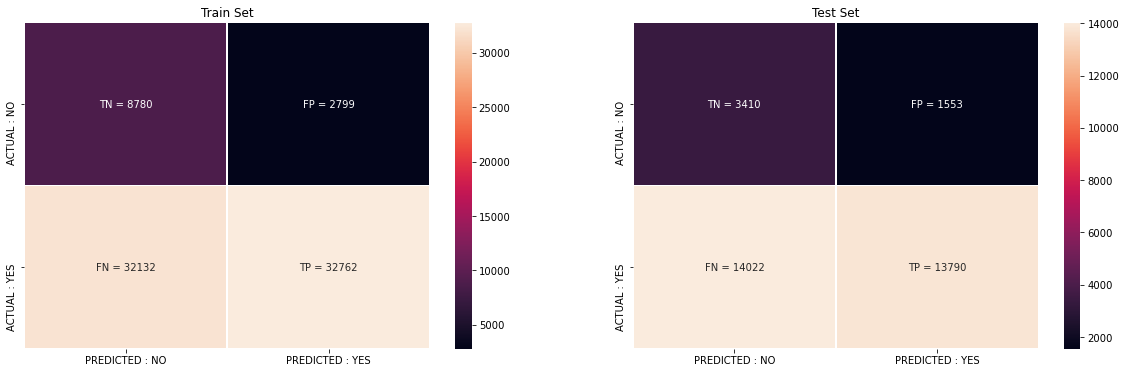

In [87]:
plot_confusion_matrix(train_confusion_matrix_avg_w2v,test_confusion_matrix_avg_w2v)

### 7.3.3 False Positive Essay Word Cloud

In [88]:
y_test_pred_score = predict_with_best_t(y_test_pred,best_t_avg_w2v)

In [89]:
y_test_pred_score[1:10]

[0, 0, 1, 1, 0, 0, 1, 0, 1]

In [90]:
fpi = []
for i in range(len(y_test_pred_score)):
    if((y_test.values[i] == 0) & (y_test_pred_score[i] == 1)):
        fpi.append(i)

In [91]:
fp_essay = []
essay = x_test['essay'].values
for i in fpi:
    fp_essay.append(essay[i])

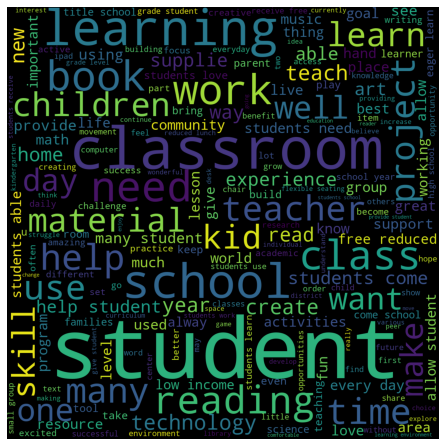

In [92]:
## https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200, stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### 7.3.4 Box Plot of 'Price' of False Positives

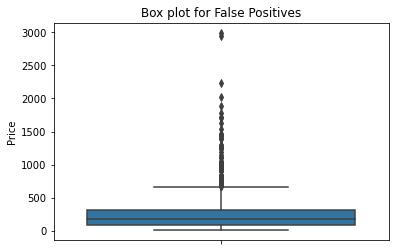

In [93]:
df = pd.DataFrame(x_test)
df_fp = df.iloc[fpi,:]
sns.boxplot(y = df_fp['price'].values)
plt.title("Box plot for False Positives")
plt.ylabel("Price")
plt.show()

### 7.3.5 PDF of 'teacher_number_of_previously_posted_projects' of these False positive data points

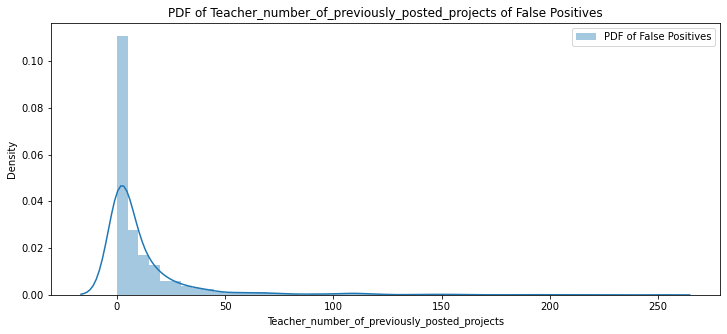

In [94]:
plt.figure(figsize=(12,5))
sns.distplot(df_fp['teacher_number_of_previously_posted_projects'].values, label="PDF of False Positives")
plt.title('PDF of Teacher_number_of_previously_posted_projects of False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

## 7.4 Applying Decision Tree on TFIDF-W2V related features

In [95]:
## HyperParameter tuning using GridSearchCV

dt = DecisionTreeClassifier()
params = {'max_depth':[1,3,5,10,20,30],
          'min_samples_split':[5,10,50,100,200,300,500]
         }
clf = GridSearchCV(dt,params,scoring='roc_auc',return_train_score=True,cv=3,n_jobs=-1)
clf.fit(X_tr_tfidf_w2v,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 50, 100, 200, 300, 500]},
             return_train_score=True, scoring='roc_auc')

Text(0.5, 1.0, 'CV Set')

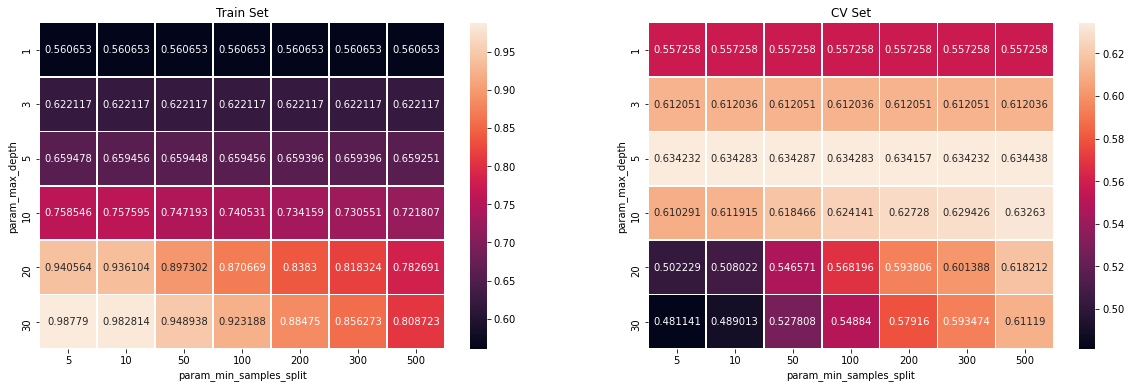

In [96]:
## https://stackoverflow.com/questions/24640399/how-to-unstack-or-pivot-in-pandas
best_scores_tfidf_w2v = pd.DataFrame(clf.cv_results_).groupby(['param_max_depth','param_min_samples_split']).max().unstack()[['mean_train_score','mean_test_score']]

import seaborn as sns

## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig,ax = plt.subplots(1,2, figsize = (20,6))

## https://seaborn.pydata.org/generated/seaborn.heatmap.html
## https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
sns.heatmap(best_scores_tfidf_w2v.mean_train_score, annot = True, fmt = 'g', ax = ax[0], linewidths=.5)
sns.heatmap(best_scores_tfidf_w2v.mean_test_score, annot = True, fmt = 'g', ax = ax[1], linewidths=.5)
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

In [97]:
print('Best hyper parameter:', clf.best_params_)
print('Best score:',clf.best_score_)

Best hyper parameter: {'max_depth': 5, 'min_samples_split': 500}
Best score: 0.634437644087627


### 7.4.1 Training Model Using Best HyperParameter and Plotting ROC Curve

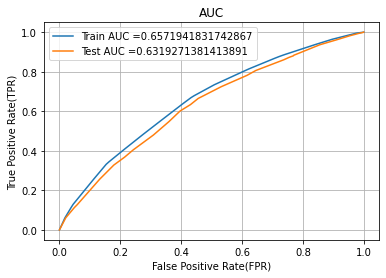

In [98]:
dt = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], 
                                   min_samples_split=clf.best_params_['min_samples_split'])
dt.fit(X_tr_tfidf_w2v,y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# predicting train,test proba. scores
y_train_pred = pred_proba(dt,X_tr_tfidf_w2v)
y_test_pred = pred_proba(dt,X_te_tfidf_w2v)

#print(y_test_pred)

# fetching fpr,tpr,threshold values for train,test data
train_fpr, train_tpr, tr_threshold = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test,y_test_pred)

# plotting the ROC curve on both train and test.
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

### 7.4.2 Visualizing Confusion Matrix on Train and Test Data

In [99]:
from sklearn.metrics import confusion_matrix
import numpy as np
print("="*100)
best_t_tfidf_w2v = find_best_threshold(tr_threshold,train_tpr,train_tpr)
print("Train confusion matrix")
train_confusion_matrix_tfidf_w2v = confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t_tfidf_w2v))
print(train_confusion_matrix_tfidf_w2v)
print("="*100)
print("Test confusion matrix")
test_confusion_matrix_tfidf_w2v = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t_tfidf_w2v))
print(test_confusion_matrix_tfidf_w2v)

The maximum value of tpr*(1-fpr) 0.2497316772846999 for threshold 0.873
Train confusion matrix
[[ 8392  3187]
 [33510 31384]]
Test confusion matrix
[[ 3431  1532]
 [14465 13347]]


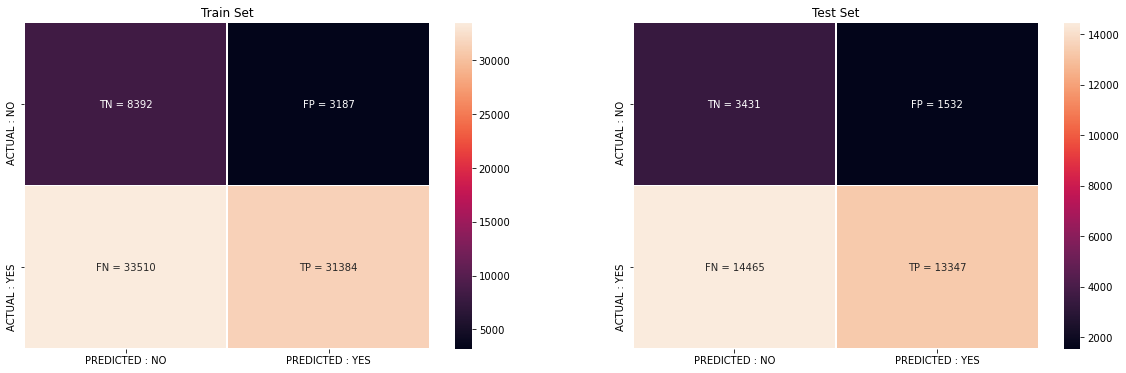

In [100]:
plot_confusion_matrix(train_confusion_matrix_tfidf_w2v,test_confusion_matrix_tfidf_w2v)

### 7.4.3 False Positive Essay Word Cloud

In [101]:
y_test_pred_score = predict_with_best_t(y_test_pred,best_t_tfidf_w2v)

In [102]:
y_test_pred_score[1:10]

[1, 0, 1, 1, 0, 1, 1, 0, 0]

In [103]:
fpi = []
for i in range(len(y_test_pred_score)):
    if((y_test.values[i] == 0) & (y_test_pred_score[i] == 1)):
        fpi.append(i)

In [104]:
fp_essay = []
essay = x_test['essay'].values
for i in fpi:
    fp_essay.append(essay[i])

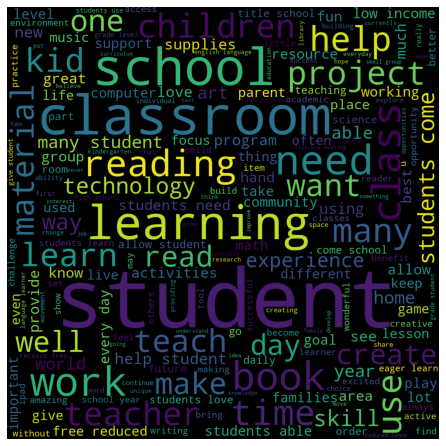

In [105]:
## https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200, stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### 7.4.4 Box Plot of 'Price' of False Positives

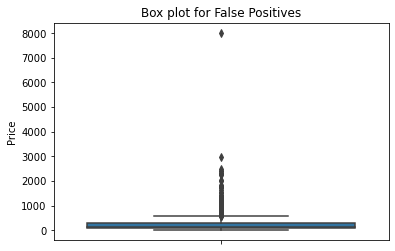

In [106]:
df = pd.DataFrame(x_test)
df_fp = df.iloc[fpi,:]
sns.boxplot(y = df_fp['price'].values)
plt.title("Box plot for False Positives")
plt.ylabel("Price")
plt.show()

### 7.4.5 PDF of 'teacher_number_of_previously_posted_projects' of these False positive data points

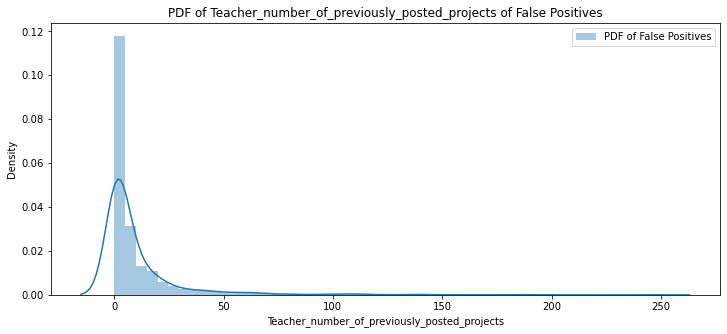

In [107]:
plt.figure(figsize=(12,5))
sns.distplot(df_fp['teacher_number_of_previously_posted_projects'].values, label="PDF of False Positives")
plt.title('PDF of Teacher_number_of_previously_posted_projects of False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

# 8. Summary

In [110]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
TB = PrettyTable()
TB.field_names = ["Model", "Hyperparameter", "Train_AUC", "Test_Auc"]
TB.title = "Decision Tree"
TB.add_row(["BOW Model", "Depth:10 | Samp_Split:300", 0.6983, 0.6483])
TB.add_row(["TFIDF Model", "Depth:10 | Samp_Split:500", 0.6909, 0.6518])
TB.add_row(["Avg. W2V Model", "Depth:10 | Samp_Split:500", 0.7091, 0.6298])
TB.add_row(["TfIdf W2V Model", "Depth:5 | Samp_Split:500", 0.6571, 0.6319])
print(TB)

+--------------------------------------------------------------------+
|                           Decision Tree                            |
+-----------------+---------------------------+-----------+----------+
|      Model      |       Hyperparameter      | Train_AUC | Test_Auc |
+-----------------+---------------------------+-----------+----------+
|    BOW Model    | Depth:10 | Samp_Split:300 |   0.6983  |  0.6483  |
|   TFIDF Model   | Depth:10 | Samp_Split:500 |   0.6909  |  0.6518  |
|  Avg. W2V Model | Depth:10 | Samp_Split:500 |   0.7091  |  0.6298  |
| TfIdf W2V Model |  Depth:5 | Samp_Split:500 |   0.6571  |  0.6319  |
+-----------------+---------------------------+-----------+----------+
